In [3]:
#import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


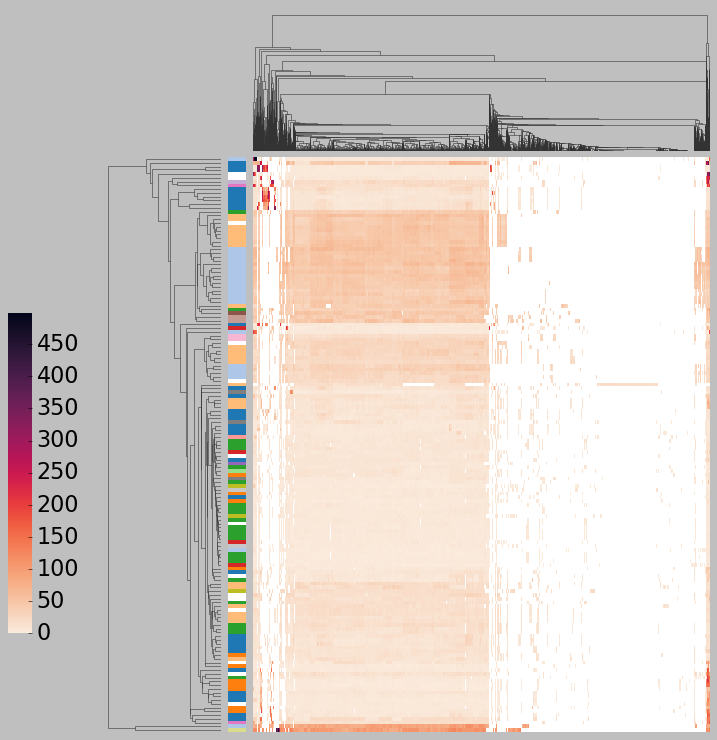

In [5]:
#read in file
heatmap_input=pd.read_csv('../../data/heatmap.csv')

#visualize results
mask=heatmap_input<0
plt.style.use('classic')

#create color codes
taxonomy_data=pd.read_csv('../../data/taxonomy_data.csv',index_col=0)
taxonomy_data=taxonomy_data.drop_duplicates(subset='organism_name')
taxonomy_data=taxonomy_data.set_index('organism_name',drop=True)
order_dict=taxonomy_data['order'].dropna()
orders=order_dict.reindex(heatmap_input.index)
colors=pd.Series(     
    data=['#1f77b4ff','#aec7e8ff','#ff7f0eff','#ffbb78ff','#2ca02cff','#98df8aff','#d62728ff','#ff9896ff',          
          '#9467bdff','#c5b0d5ff','#8c564bff','#c49c94ff','#e377c2ff','#f7b6d2ff','#7f7f7fff','#c7c7c7ff',          
          '#bcbd22ff','#dbdb8dff','#FFFFFF','#FFFFFF','#FFFFFF'],     
    index=['Carnivora','Primates','Chiroptera','Artiodactyla','Rodentia','Pilosa','Eulipotyphla','Cingulata',            
           'Microbiotheria','Macroscelidea','Dermoptera','Didelphimorphia','Proboscidea','Pholidota','Lagomorpha',           
           'Monotremata','Diprotodontia','Dasyuromorphia','Perissodactyla','Tubulidentata',np.nan] 
)
order_colors=colors.reindex(orders.values).tolist()

#robust means that no outliers are displayed
heatmap=sns.clustermap(heatmap_input,cmap='rocket_r',mask=mask,row_colors=order_colors,cbar_pos=(-.1, .2, .03, .4))
ax=heatmap.ax_heatmap
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
ax.set_xticks([])
ax.set_yticks([])
heatmap.savefig('../../results/heatmap.eps',dpi=400)